<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#金融和经济数据应用" data-toc-modified-id="金融和经济数据应用-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>金融和经济数据应用</a></span><ul class="toc-item"><li><span><a href="#数据规整化方面的话题" data-toc-modified-id="数据规整化方面的话题-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据规整化方面的话题</a></span><ul class="toc-item"><li><span><a href="#时间序列以及截面对齐" data-toc-modified-id="时间序列以及截面对齐-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>时间序列以及截面对齐</a></span></li><li><span><a href="#频率不同的时间序列的运算" data-toc-modified-id="频率不同的时间序列的运算-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>频率不同的时间序列的运算</a></span></li><li><span><a href="#使用period" data-toc-modified-id="使用period-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>使用period</a></span></li><li><span><a href="#时间和“最当前”数据选取" data-toc-modified-id="时间和“最当前”数据选取-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>时间和“最当前”数据选取</a></span></li><li><span><a href="#拼接多个数据源" data-toc-modified-id="拼接多个数据源-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>拼接多个数据源</a></span></li><li><span><a href="#收益指数和累计收益" data-toc-modified-id="收益指数和累计收益-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>收益指数和累计收益</a></span></li></ul></li><li><span><a href="#分组变换和分析" data-toc-modified-id="分组变换和分析-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>分组变换和分析</a></span><ul class="toc-item"><li><span><a href="#分组因子暴露" data-toc-modified-id="分组因子暴露-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>分组因子暴露</a></span></li><li><span><a href="#十分位和四分位分析" data-toc-modified-id="十分位和四分位分析-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>十分位和四分位分析</a></span></li></ul></li></ul></li></ul></div>

In [1]:
#coding:utf-8
%matplotlib inline
#上面语句：使图片内嵌交互环境显示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

In [2]:
# 科学计算用
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

# 金融和经济数据应用

## 数据规整化方面的话题

### 时间序列以及截面对齐

在处理金融数据时, 最费神的一个问题是所谓的"数据对齐"(data alignment)问题. 

两个相关的时间序列的索引可能没有很好的对齐, 或两个DF对象可能含有不匹配的行或列

pandas可以在算术运算中自动对齐数据. 
在实际工作中, 这不仅能给你带来极大的自由度, 而且还能提高工作效率.

In [3]:
# 下面的DF, 分别含有股票价格和成交量的时间序列
close_px = pd.read_csv(r'ch11\stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv(r'ch11\volume.csv', parse_dates=True, index_col=0)
prices = close_px.loc['2011-09-05':'2011-09-14', ['AAPL', 'JNJ', 'SPX', 'XOM']]
volume = volume.loc['2011-09-05':'2011-09-12', ['AAPL', 'JNJ', 'XOM']]

In [4]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [5]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500.0,15848300.0,25416300.0
2011-09-07,12492000.0,10759700.0,23108400.0
2011-09-08,14839800.0,15551500.0,22434800.0
2011-09-09,20171900.0,17008200.0,27969100.0
2011-09-12,16697300.0,13448200.0,26205800.0


In [6]:
# 假设想要用所有有效数据计算一个成交量加权平均价格(简单起见, 假设成交量数据是价格数据的子集).
# 由于pandas会在算术运算过程中自动将数据对齐, 并在sum这样的函数中排除缺失数据, 所以只需要编写简洁的表达式即可:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [7]:
vwap = (prices* volume).sum() / volume.sum()

In [8]:
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [9]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [10]:
# 由于SPX在volume中找不到, 所以随时可以显式地丢弃. 如果希望手工对齐, 可以使用DF的align方法:
prices.align(volume,join='inner') # 返回元祖，含有两个对象的重索引版本

(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                   AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0)

In [11]:
# 另一个功能是, 通过一组索引可能不同的Series构建一个DF
s1 = Series(range(3), index=['a', 'b', 'c'])
s2 = Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = Series(range(3), index=['f', 'a', 'c'])
DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,three,two
a,0.0,1.0,NaN
b,1.0,NaN,1.0
c,2.0,2.0,2.0
d,NaN,NaN,0.0
e,NaN,NaN,3.0
f,NaN,0.0,NaN


In [12]:
# 也可以显式定义结果的索引
DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,NaN
c,2.0,2.0,2.0
e,NaN,NaN,3.0


### 频率不同的时间序列的运算

- 经济学时间序列常常有按年, 季, 月, 日计算的或其他更特殊的频率. 有些完全是不规则的. 比如: 盈利预测调整随时都可能发生. 
- 频率转换和重对齐的两大主要工具是resample和reindex方法. 
    - resample用于将数据转换到固定频率, 
    - 而reindex则用于是数据符合一个新索引. 
    - 它们都支持插值逻辑.

In [13]:
ts1 = Series(np.random.randn(3), 
             index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))

In [14]:
ts1

2012-06-13    0.158547
2012-06-20    0.315273
2012-06-27   -0.560525
Freq: W-WED, dtype: float64

In [15]:
# 将它重采样到工作日频率, 则没有数据的日期会出现NaN
ts1.resample('B').mean()

2012-06-13    0.158547
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20    0.315273
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27   -0.560525
Freq: B, dtype: float64

In [16]:
# 也可以使用ffill或bfill方法填充缺失值
ts1.resample('B').ffill()

2012-06-13    0.158547
2012-06-14    0.158547
2012-06-15    0.158547
2012-06-18    0.158547
2012-06-19    0.158547
2012-06-20    0.315273
2012-06-21    0.315273
2012-06-22    0.315273
2012-06-25    0.315273
2012-06-26    0.315273
2012-06-27   -0.560525
Freq: B, dtype: float64

实际工作中, 将较低频率采样到较高的规整频率是一种不错的解决方案, 

但是对于更一般化的不规整时间序列可能不太合适:

In [17]:
dates = pd.DatetimeIndex(
    ['2012-6-12', '2012-6-17', '2012-6-18', '2012-6-21', '2012-6-22', '2012-6-29'])
ts2 = Series(np.random.randn(6), index=dates)

In [18]:
ts2

2012-06-12    0.304261
2012-06-17    0.057522
2012-06-18    0.146764
2012-06-21   -0.779344
2012-06-22   -0.079182
2012-06-29   -1.524208
dtype: float64

如果要将ts1中"最当前"的值(即前向填充)加到ts2上
- 一个办法是将两者重采样为规整频率后再相加, 
- 但是如果想维持ts2中的日期索引, 则reindex会是一个更好的办法:

In [19]:
ts1.reindex(ts2.index,method='ffill')

2012-06-12         NaN
2012-06-17    0.158547
2012-06-18    0.158547
2012-06-21    0.315273
2012-06-22    0.315273
2012-06-29   -0.560525
dtype: float64

In [20]:
ts2 + ts1.reindex(ts2.index,method='ffill')

2012-06-12         NaN
2012-06-17    0.216069
2012-06-18    0.305311
2012-06-21   -0.464071
2012-06-22    0.236091
2012-06-29   -2.084733
dtype: float64

### 使用period

Period(时间区间)提供了另一种处理不同频率时间序列的办法, 尤其是那些有特殊规范的以年或季度为频率的金融或经济序列. 

比如: 一个公司可能会发布其以6月结尾的财年的每年度盈利报告, 即频率为Q-JUN. 

来看两个有关GDP和通货膨胀的宏观经济时间序列:

In [21]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))

In [22]:
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [23]:
infl = Series([0.025, 0.045, 0.037, 0.04],
              index=pd.period_range('1982', periods=4, freq='A-DEC'))

In [24]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

跟Timestamp时间序列不同, 有Period索引的两个不同频率的时间序列之间的运算必须进行显式转换. 

本例中, 假设已知infl值是在每年年末观测的, 于是就可以将其转换到Q-SEP以得到该频率下的正确时期:

In [25]:
infl_q = infl.asfreq('Q-SEP',how='end')

In [26]:
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [27]:
# 然后重新索引
infl_q.reindex(gdp.index,method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### 时间和“最当前”数据选取

假设有一个很长的盘中市场数据时间序列, 现在希望抽取其中每天特定时间的价格数据. 

如果数据不规整, 该怎么办? 在实际工作中, 如果不够小心的话, 很容易导致错误的数据规整化.

In [28]:
# 生成一个交易日内的日期范围和时间序列
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')

In [29]:
# 生成5天的时间点(9:30-15:59之间的值)
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1,4)])

In [30]:
ts = Series(np.arange(len(rng),dtype=float),index = rng)

In [31]:
ts[:5],ts[-6:]

(2012-06-01 09:30:00    0.0
 2012-06-01 09:31:00    1.0
 2012-06-01 09:32:00    2.0
 2012-06-01 09:33:00    3.0
 2012-06-01 09:34:00    4.0
 dtype: float64, 2012-06-06 15:54:00    1554.0
 2012-06-06 15:55:00    1555.0
 2012-06-06 15:56:00    1556.0
 2012-06-06 15:57:00    1557.0
 2012-06-06 15:58:00    1558.0
 2012-06-06 15:59:00    1559.0
 dtype: float64)

In [32]:
# 利用python的datetime.time对象进行索引即可抽取时间点上的值
from datetime import time
ts[time(10,0)]

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [33]:
# 等同于at_time
ts.at_time(time(10,0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [34]:
# 选取两个time对象之间的值
ts.between_time(time(10,0),time(10,1))

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [35]:
# 如果刚好没有任何数据落在某个具体的时间上, 希望得到上午10点之前最后出现的值

# 将该时间序列的大部分内容随机设置为NA
indexer = np.sort(np.random.permutation(len(ts))[700:])

In [36]:
irr_ts = ts.copy()

In [37]:
irr_ts[indexer] = np.nan

In [38]:
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00     NaN
2012-06-01 09:51:00    21.0
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00    23.0
2012-06-01 09:54:00    24.0
2012-06-01 09:55:00     NaN
2012-06-01 09:56:00    26.0
2012-06-01 09:57:00    27.0
2012-06-01 09:58:00    28.0
2012-06-01 09:59:00    29.0
2012-06-01 10:00:00    30.0
dtype: float64

In [39]:
# 将一组Timestamp传入asof方法, 能得到时间点处的有效值(非NA), 构造一个日期范围, 然后传入asof
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     419.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
Freq: B, dtype: float64

In [40]:
ts.asof(selection)

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
Freq: B, dtype: float64

### 拼接多个数据源

在金融领域中, 有几个常见的情况:
- 在一个特定的时间点上, 从一个数据源切换到另一个数据源
- 用另一个时间序列对当前时间序列的缺失值"打补丁"
- 将数据中的符号(国家, 资产编号等)替换为实际数据

In [41]:
# 对于第一种情况, 在特定时刻从一个时间序列切换到另一个时间序列, 其实就是pandas.concat将两个TimeSeries或DF对象合并到一起
data1 = DataFrame(np.ones((6, 3), dtype=float), 
                  columns=['a', 'b', 'c'], 
                  index=pd.date_range('6/12/2012', periods=6))
data2 = DataFrame(np.ones((6, 3), dtype=float) * 2, 
                  columns=['a', 'b', 'c'], 
                  index=pd.date_range('6/13/2012', periods=6))

In [42]:
spliced = pd.concat([data1.loc[:'2012-06-14'], 
                     data2.loc['2012-06-15':]])

In [43]:
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [44]:
# 假设data1缺失了data2中存在的某个时间序列:
data2 = DataFrame(np.ones((6, 4), dtype=float) * 2, 
                  columns=['a', 'b', 'c', 'd'], 
                  index=pd.date_range('6/13/2012', periods=6))

In [45]:
spliced = pd.concat([data1.loc[:'2012-06-14'],
                     data2.loc['2012-06-15':]])

In [46]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [47]:
# combine_first可以引入合并点之前的数据, 这样也就扩展了'd'项的历史
spliced_filled = spliced.combine_first(data2)

In [48]:
spliced_filled #由于data2没有关于2012-06-12的数据, 所以也就没有值被填充到那一天.

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [49]:
# DF也有一个类似的方法update, 它可以实现就地更新. 
# 如果只是填充缺失值, 则必须传入overwrite=False:
spliced.update(data2,overwrite=False)

In [50]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [51]:
# 上面所讲的方法都可以实现将数据中的符号替换为实际数据, 但有时利用DF的索引直接对列进行设置会更简单:
cp_spliced = spliced.copy()

In [52]:
cp_spliced[['a','c']] = data1[['a','c']]

In [53]:
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


### 收益指数和累计收益

In [54]:
# 金融领域中, 收益(return)通常指某资产价格的百分比变化. 看看2011年到2012年见苹果的股票价格数据:
import tushare as ts

In [55]:
# 贵州茅台600519；青岛啤酒600600；重庆啤酒600132；老白干酒600559
# ts.get_k_data('600848',start='2015-01-05',end='2015-01-09')
data_dic = {'600519':'贵州茅台',
            '600600':'青岛啤酒',
            '600132':'重庆啤酒',
            '600559':'老白干酒'}
all_data = {}

In [56]:
for ticker in data_dic.keys():
    ts_data = ts.get_k_data(ticker,start = '2015-01-01',end = '2017-12-31')
    ts_data['date'] = pd.to_datetime(ts_data['date'])
    ts_data.set_index('date',inplace = True) # inplace表示在原数据上修改，默认情况下设置成索引的列，将从内容列中删除 
    all_data[ticker] = ts_data

In [57]:
price = DataFrame({tic:data['close'] for tic,data in all_data.items()})
price.rename(columns=data_dic,inplace = True)

In [58]:
volume = DataFrame({tic:data['volume'] for tic,data in all_data.items()})
volume.rename(columns=data_dic,inplace = True)

In [59]:
price['贵州茅台'][-5:]

date
2017-12-25    688.12
2017-12-26    680.81
2017-12-27    664.18
2017-12-28    718.69
2017-12-29    697.49
Name: 贵州茅台, dtype: float64

In [60]:
# 对于茅台的股价, 计算两个时间点之间的累计百分比回报只需计算价格的百分比变化即可:
price['贵州茅台']['2017-12-26'] / price['贵州茅台']['2017-12-25'] - 1

-0.010623147125501498

In [61]:
# 算出一个收益指数, 它是一个表示单位投资收益的时间序列. 从收益指数中可以得出许多假设. 
# 例如: 人们可以决定是否进行利润在投资. 对于茅台公司的情况, 可以利用cumprod计算出一个简单的收益指数:
returns = price['贵州茅台'].pct_change()

In [62]:
ret_index = (1 + returns).cumprod() # comprod累计积

In [63]:
ret_index[0] = 1 # 将第一个值设置为1

In [64]:
ret_index[:5],ret_index[-6:]

(date
 2015-01-05    1.000000
 2015-01-06    0.976842
 2015-01-07    0.952698
 2015-01-08    0.946869
 2015-01-09    0.939709
 Name: 贵州茅台, dtype: float64, date
 2017-12-22    3.914591
 2017-12-25    3.944398
 2017-12-26    3.902496
 2017-12-27    3.807171
 2017-12-28    4.119630
 2017-12-29    3.998108
 Name: 贵州茅台, dtype: float64)

In [65]:
# 得到收益指数后, 计算指定时期的累计收益就简单了:
m_returns = ret_index.resample('BM').last().pct_change()

In [66]:
m_returns['2016']

date
2016-01-29   -0.080388
2016-02-29    0.071068
2016-03-31    0.152296
2016-04-29    0.014376
2016-05-31    0.052825
2016-06-30    0.103795
2016-07-29    0.095846
2016-08-31   -0.009453
2016-09-30   -0.039589
2016-10-31    0.067271
2016-11-30    0.003553
2016-12-30    0.047228
Freq: BM, Name: 贵州茅台, dtype: float64

In [67]:
# 上面的结果也可以通过重采样聚合从日百分比变化中计算出来
m_rets = (1 + returns).resample('M', kind='period').prod() - 1
m_rets['2016']

date
2016-01   -0.080388
2016-02    0.071068
2016-03    0.152296
2016-04    0.014376
2016-05    0.052825
2016-06    0.103795
2016-07    0.095846
2016-08   -0.009453
2016-09   -0.039589
2016-10    0.067271
2016-11    0.003553
2016-12    0.047228
Freq: M, Name: 贵州茅台, dtype: float64

## 分组变换和分析

In [68]:
import random;random.seed(0)
import string

In [69]:
# 生成1000个股票代码
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join(random.choice(choices) for _ in range(n))
tickers = np.array([rands(5) for _ in range(N)])

In [70]:
tickers[:5]

array(['MYNBI', 'QPMZJ', 'PLSGQ', 'EJEYD', 'TZIRW'], 
      dtype='<U5')

In [71]:
# 创建一个含有3列的DF来承载这些数据, 不过只选择部分股票组成该投资组合
M = 500
df = DataFrame(
    {
        'Momentum' : np.random.randn(M) / 200 + 0.03,
        'Value' : np.random.randn(M) / 200 + 0.08,
        'ShortInterest' : np.random.randn(M) / 200 - 0.02
    },
    index=tickers[:M]
)

In [72]:
# 为这些股票随机创建一个行业分类. 为了简单, 只选用2个行业, 并映射到Series中
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers, name='industry')

In [73]:
# 现在, 可以根据行业分类进行分组并执行分组聚合和变换
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
FINANCIAL,0.029563,-0.019563,0.080190
TECH,0.029917,-0.020383,0.079581


In [74]:
by_industry.describe()

Momentum                                                    \
             count      mean       std       min       25%       50%   
industry                                                               
FINANCIAL    248.0  0.029563  0.004934  0.018458  0.025972  0.029408   
TECH         252.0  0.029917  0.005129  0.016440  0.026642  0.029910   

                              ShortInterest              ...               \
                75%       max         count      mean    ...          75%   
industry                                                 ...                
FINANCIAL  0.032935  0.044703         248.0 -0.019563    ...    -0.016287   
TECH       0.033336  0.044200         252.0 -0.020383    ...    -0.016560   

                     Value                                                    \
                max  count      mean       std       min       25%       50%   
industry                                                                       
FINANCIAL -0.005263  248.0  0.080190  0.004881  0.066700  0.076849  0.080067   
TECH      -0.007333  252.0  0.079581  0.005456  0.066188  0.075976  0.079373   

                               
                75%       max  
industry                       
FINANCIAL  0.083724  0.091604  
TECH       0.083023  0.097320  

[2 rows x 24 columns]

In [75]:
# 要对这些按行业分组的投资组合进行各种变换, 可以编写自定义的变换函数. 
# 例如行业内标准化处理, 它广泛用于股票资产投资组合的构建过程
def zscore(group):
    return (group - group.mean()) / group.std()

In [76]:
df_stand = by_industry.apply(zscore)
df_stand.groupby(industries).agg(['mean', 'std'])    # 这样处理后, 各行业的平均值为0, 标准差为1

Momentum      ShortInterest              Value     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL -4.249513e-15  1.0 -1.898123e-15  1.0 -4.030770e-15  1.0
TECH      -2.871160e-15  1.0  1.223889e-15  1.0  6.133982e-15  1.0

In [77]:
# 内置变换函数的用法更简洁
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min', 'max'])

Momentum        ShortInterest        Value       
               min    max           min    max   min    max
industry                                                   
FINANCIAL      1.0  248.0           1.0  248.0   1.0  248.0
TECH           1.0  252.0           1.0  252.0   1.0  252.0

In [78]:
# 在股票投资组合的定量分析中, "排名和标准化"是一种很常见的变换运算组合. 通过将rank和zscore链接在一起即可完成整个变换过程:
by_industry.apply(lambda x: zscore(x.rank())).describe()

,Momentum,ShortInterest,Value
count,5.000000e+02,5.000000e+02,5.000000e+02
mean,4.163336e-18,-9.769963e-18,-9.436896e-19
std,9.989975e-01,9.989975e-01,9.989975e-01
min,-1.721765e+00,-1.721765e+00,-1.721765e+00
25%,-8.608824e-01,-8.608824e-01,-8.608824e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.608824e-01,8.608824e-01,8.608824e-01
max,1.721765e+00,1.721765e+00,1.721765e+00


### 分组因子暴露

因子分析是投资组合定量管理中的一种技术.

投资组合的收益和损失可以被分解为一个或多个表示投资组合权重的因子.

例如: 某只股票的价格与某个基准(比如普尔500指数)的协动性被称为beta风险系数.

In [145]:
fac1, fac2, fac3 = np.random.rand(3, 1000)

In [146]:
ticker_subset = tickers.take(np.random.permutation(N)[:1000])

In [147]:
# 因子加权和以及噪声
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + np.random.randn(1000),
              index=ticker_subset)

In [148]:
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)

In [149]:
# 各因子于投资组合之间的矢量相关性可能说明不了问题
factors.corrwith(port)

f1    0.154302
f2   -0.336507
f3    0.078630
dtype: float64

In [150]:
# 计算因子暴露的标准方式是最小二乘回归. 使用statsmodels.api.OLS, 即可计算出整个投资组合的暴露
import statsmodels.api as sm # http://www.statsmodels.org/stable/regression.html

In [151]:
factors = sm.add_constant(factors, prepend=False) # 添加一列，值均为1

In [152]:
model = sm.OLS(port,factors)

In [153]:
results = model.fit()

In [154]:
results.params

f1       0.556068
f2      -1.305885
f3       0.289135
const    0.181218
dtype: float64

In [156]:
factors.head()

,f1,f2,f3,const
KXVEF,0.315165,0.852328,0.507035,1.0
PZXPR,0.803261,0.877276,0.118241,1.0
ZSCCR,0.074582,0.093467,0.994241,1.0
AEGXS,0.736722,0.126260,0.855886,1.0
DGDPN,0.017622,0.614624,0.783602,1.0


不难看出, 由于没有给投资组合添加过多的随机噪声, 所以原始的因子权重基本上可以算是恢复出来了.

还可以通过groupby计算各行业的暴露值. 为了达到这个目的, 先编写一个函数:

In [157]:
def beta_exposure(chunk, factors=None):
    factors = sm.add_constant(factors, prepend=False)
    model = sm.OLS(port,factors)
    results = model.fit()
    return results.params

In [158]:
by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

,f1,f2,f3,const
industry,,,,
FINANCIAL,0.556068,-1.305885,0.289135,0.181218
TECH,0.556068,-1.305885,0.289135,0.181218


### 十分位和四分位分析

基于样本分位数的分析是金融分析师的另一个重要工具. 

例如, 股票投资组合的性能可以根据各股的市盈率被划分如四分位(四个大小相等的块). 

通过pandas.qcut和groupby可以很轻松的实现分位数分析.

下面利用跟随策略或动量交易策略通过SPY交易所交易基金买卖标准普尔500指数:

In [161]:
ts_data = ts.get_k_data('600519',start = '2015-01-01',end = '2017-12-31')
ts_data['date'] = pd.to_datetime(ts_data['date'])
ts_data.set_index('date',inplace = True) # inplace表示在原数据上修改，默认情况下设置成索引的列，将从内容列中删除 
ts_data.head()

,open,close,high,low,volume,code
date,,,,,,
2015-01-05,163.343,174.455,175.937,162.542,94515.0,600519
2015-01-06,172.284,170.415,174.490,168.856,55020.0,600519
2015-01-07,168.873,166.203,171.854,163.662,54797.0,600519
2015-01-08,167.116,165.186,167.564,163.791,40525.0,600519
2015-01-09,164.015,163.937,168.641,163.765,53982.0,600519


In [163]:
# 计算日收益率, 并编写函数用于将收益率变换为趋势信号
px = ts_data['close']
returns = px.pct_change()# 相关系数

In [164]:
def to_index(rets):
    index = (1 + rets).cumprod() # cumprod累积（后一个乘以前一个）
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

In [165]:
def trend_signal(rets, lookback, lag):
    signal = rets.rolling(min_periods=lookback - 5, window=100, center=False).sum()
    return signal.shift(lag)

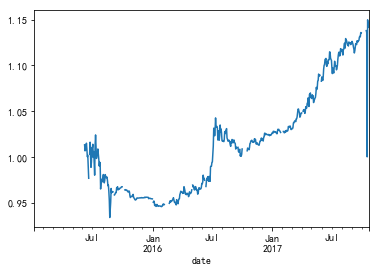

In [166]:
# 通过该函数, 可以创建和测试一种根据每周5动量信号进行交易的交易策略
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').mean().resample('B').ffill()
trade_rets = trade_friday.shift(1) * returns
trade_rets = trade_rets[:len(returns)]
to_index(trade_rets).plot()    # 见下图

假如希望将该策略的性能按不同大小的交易期波幅进行划分. 

年度标准差是计算波幅的一种简单办法. 可以通过计算夏普比率来观察不同波动机制下的风险收益率:

In [167]:
vol = returns.rolling(min_periods=200,window=250,center=False).std() * np.sqrt(250)

In [168]:
def sharpe(rets, ann=250):
    return rets.mean() / rets.std()  * np.sqrt(ann)

In [169]:
# 利用qcut将vol划分为四等分, 并用reshape进行聚合
cats = pd.qcut(vol, 4)

In [170]:
trade_rets.groupby(cats).agg(sharpe)

close
(0.198, 0.232]    2.224510
(0.232, 0.266]    3.473572
(0.266, 0.367]    1.615043
(0.367, 0.42]     0.813174
Name: close, dtype: float64